In [7]:
!pip install --user statsmodels

  Using cached https://files.pythonhosted.org/packages/cb/83/540fd83238a18abe6c2d280fa8e489ac5fcefa1f370f0ca1acd16ae1b860/statsmodels-0.11.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/ea/0c/5f61f1a3d4385d6bf83b83ea495068857ff8dfb89e74824c6e9eb63286d8/patsy-0.5.1-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

TypeError: unhashable type: 'numpy.ndarray'

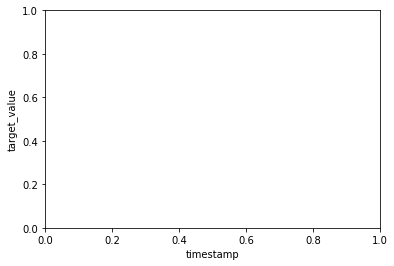

In [35]:
# df = pd.read_csv('강수확률_ver.csv',index_col=0)
# df=df[df['item_id']=='중식_소계']
# df=df[['timestamp', 'target_value','sat', 'sun']]
# df=df[(df['sat']!=1)&(df['sun']!=1)]
# df=df[['timestamp','target_value']]
# df.reset_index(inplace=True)
# df.drop('index',axis=1,inplace=True)
# df.head()

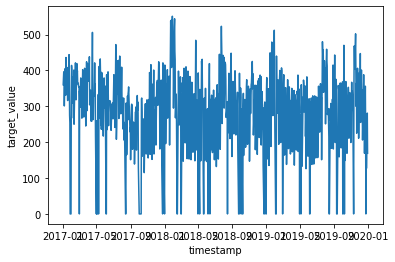

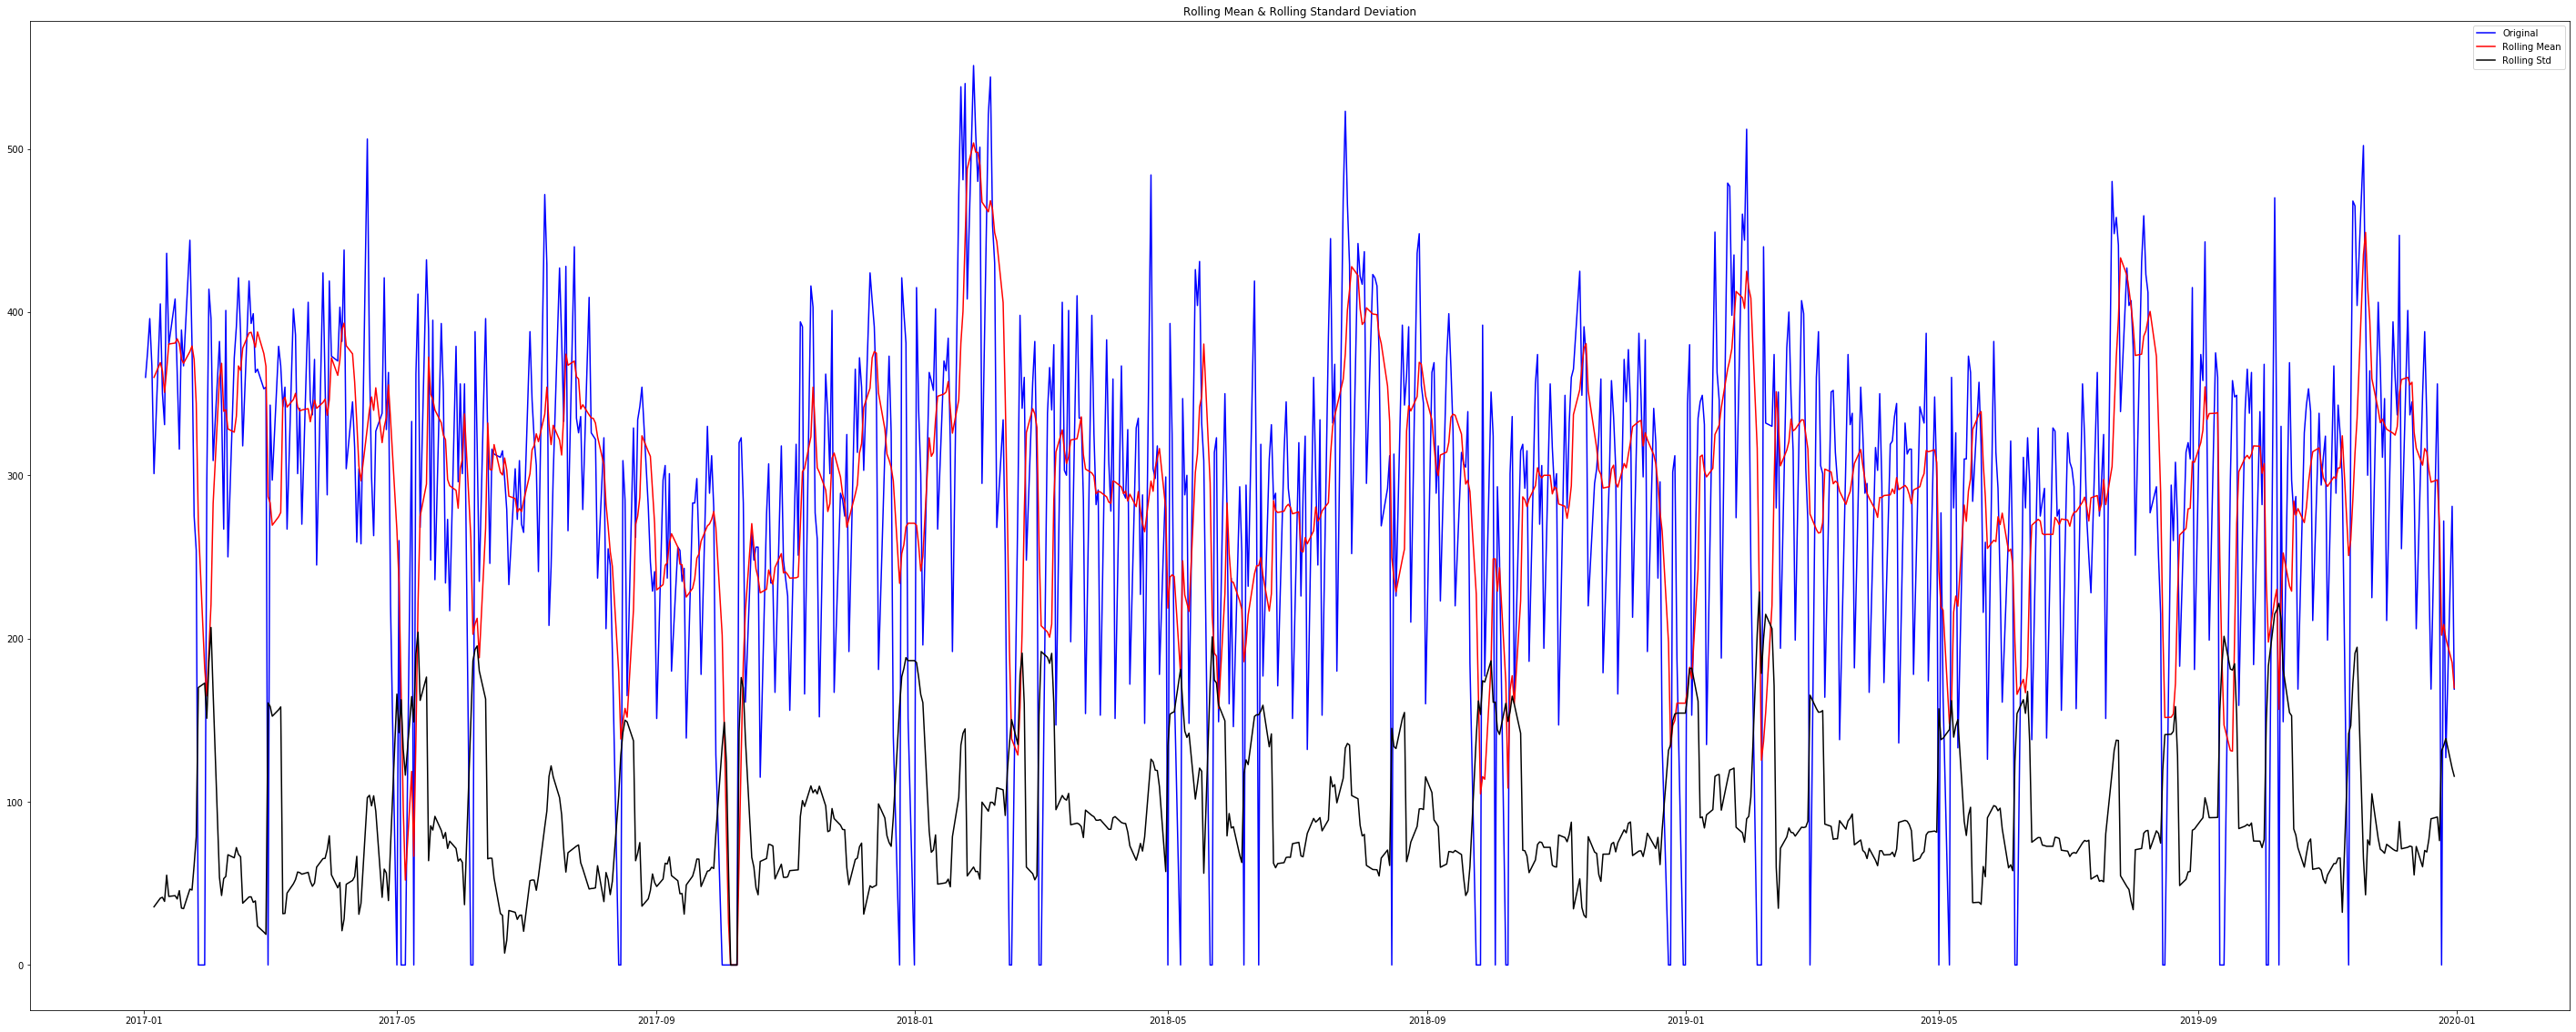

In [7]:
df = pd.read_csv('주말없.csv', parse_dates = ['timestamp'], index_col = ['timestamp'])
df.head()
plt.xlabel('timestamp')
plt.ylabel('target_value')
plt.plot(df)
rolling_mean = df.rolling(window = 5).mean()
rolling_std = df.rolling(window = 5).std()

plt.figure(figsize=(50,20))
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
result = adfuller(df['target_value'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))